In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [77]:
#obtain data from website

In [78]:
#format data into weeks, defence, and fantacy points
example = np.array([[0,5,10],[1,3,7],[2,15,20],[3,23,27],[4,2,3],[5,19,25]])
datapoints = []
print(datapoints)
print(example)
print(example[1,1])

[]
[[ 0  5 10]
 [ 1  3  7]
 [ 2 15 20]
 [ 3 23 27]
 [ 4  2  3]
 [ 5 19 25]]
3


In [85]:
#function to format data into data points
def makeDataPoints(data):
    print(len(data))
    newDataPoints=np.empty([len(data)-1,12])
    newTargets=np.empty([len(data)-1,1])
    for g in range(len(data)):
        datapoint = 0
        d0,fp0 =data[g,1], data[g,2]
        if g == 1:
            d1,fp1=data[g-1,1], data[g-1,2]
            datapoint=np.array([g,d0,d1,fp1,d1,fp1,d1,fp1,d1,fp1,d1,fp1])
        if g == 2:
            d1,fp1=data[g-1,1], data[g-1,2]
            d2,fp2=data[g-2,1], data[g-2,2]
            datapoint=np.array([g,d0,d1,fp1,d1,fp1,d1,fp1,d1,fp1,d2,fp2])
        if g == 3:
            d1,fp1=data[g-1,1], data[g-1,2]
            d2,fp2=data[g-2,1], data[g-2,2]
            d3,fp3=data[g-3,1], data[g-3,2]
            datapoint=np.array([g,d0,d1,fp1,d1,fp1,d1,fp1,d2,fp2,d3,fp3])
        if g == 4:
            d1,fp1=data[g-1,1], data[g-1,2]
            d2,fp2=data[g-2,1], data[g-2,2]
            d3,fp3=data[g-3,1], data[g-3,2]
            d4,fp4=data[g-4,1], data[g-4,2]
            datapoint=np.array([g,d0,d1,fp1,d1,fp1,d2,fp2,d3,fp3,d4,fp4])
        if g >= 5:
            d1,fp1=data[g-1,1], data[g-1,2]
            d2,fp2=data[g-2,1], data[g-2,2]
            d3,fp3=data[g-3,1], data[g-3,2]
            d4,fp4=data[g-4,1], data[g-4,2]
            d5,fp5=data[g-5,1], data[g-5,2]
            datapoint=np.array([g,d0,d1,fp1,d2,fp2,d3,fp3,d4,fp4,d5,fp5])
        newTargets[g-1]=fp0
        newDataPoints[g-1]=datapoint
    return newDataPoints, newTargets
makeDataPoints(example)

6


(array([[ 1.,  3.,  5., 10.,  5., 10.,  5., 10.,  5., 10.,  5., 10.],
        [ 2., 15.,  3.,  7.,  3.,  7.,  3.,  7.,  3.,  7.,  5., 10.],
        [ 3., 23., 15., 20., 15., 20., 15., 20.,  3.,  7.,  5., 10.],
        [ 4.,  2., 23., 27., 23., 27., 15., 20.,  3.,  7.,  5., 10.],
        [ 5., 19.,  2.,  3., 23., 27., 15., 20.,  3.,  7.,  5., 10.]]),
 array([[ 7.],
        [20.],
        [27.],
        [ 3.],
        [25.]]))

In [81]:
#format 2002-2018 into training data points

In [82]:
#format 2019 into testing data points

In [89]:
#Train regression to get weights and bias
#weightsAndBias = LinearRegression().fit(X_train, Y_train)
training_X,training_Y=makeDataPoints(example)
weightsAndBias = LinearRegression().fit(training_X,training_Y)
w = weightsAndBias.coef_
b = weightsAndBias.intercept_
print(w, b)

6
[[ 0.0246618   1.02655186 -0.10209197 -0.09916772 -0.06742029 -0.05954295
   0.12267215  0.10678794 -0.06265653 -0.0939848   0.          0.        ]] [5.90224107]


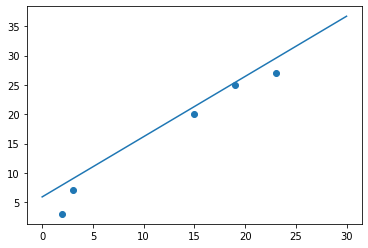

In [93]:
plt.scatter(training_X[:,1],training_Y)
X_range = np.linspace(0,30,30)
Y_range = (b + w[:,1]*X_range)
plt.plot(X_range,Y_range)